# Customer Purchase Behavior Analysis
This notebook cleans and prepares transactional retail data, engineers key features, and exports a clean dataset for SQL analysis and Power BI reporting.

## Objective
Identify high-value customer segments and purchasing drivers to inform retention, discount optimization, and subscription growth.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data
The dataset file is stored at the repo root for easy access.

In [30]:
df = pd.read_csv('customer_shopping_behavior.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Initial data overview
Inspect the dataset shape, schema, and summary statistics.

In [31]:
df.shape

(3900, 18)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [33]:
df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3863.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.750065,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716983,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


## Missing values
Review nulls and apply imputation where needed.

In [34]:
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

In [35]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [36]:
df['Review Rating'] = df.groupby('Category')['Review Rating'].transform(lambda x: x.fillna(x.median()))

In [37]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

## Standardize column names
Use snake_case for consistent SQL and pandas usage.

In [38]:
# snake casing
df.columns = df.columns.str.lower()

In [39]:
df.columns = df.columns.str.replace(' ','_')

In [40]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [41]:
df = df.rename(columns={'purchase_amount_(usd)':'purchase_amount'})
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [42]:
df.age.head()

0    55
1    19
2    50
3    21
4    45
Name: age, dtype: int64

## Feature engineering
Create age groups and a normalized purchase frequency feature to support segmentation.

In [43]:
# create a columns age_group
labels = ['Young Adult', 'Adult', 'Middle-aged','Senior']
df['age_group'] = pd.qcut(df['age'], q=4, labels=labels)

In [44]:
df[['age', 'age_group']].head()

,age,age_group
0,55,Middle-aged
1,19,Young Adult
2,50,Middle-aged
3,21,Young Adult
4,45,Middle-aged


In [45]:
# create colunm purchase_frequency_days
df['frequency_of_purchases'].value_counts()

frequency_of_purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

In [46]:
frequencies_mapping = {
    'Every 3 Months' : 90,
    'Annually' : 365,
    'Quarterly' : 90,
    'Monthly' : 30,
    'Bi-Weekly' : 14,
    'Fortnightly' : 14,
    'Weekly' : 7,
}

df['purchase_frequency_days'] = df['frequency_of_purchases'].map(frequencies_mapping)

In [47]:
df[['purchase_frequency_days', 'frequency_of_purchases']].head(15)

,purchase_frequency_days,frequency_of_purchases
0,14,Fortnightly
1,14,Fortnightly
2,7,Weekly
3,7,Weekly
4,365,Annually
5,7,Weekly
6,90,Quarterly
7,7,Weekly
8,365,Annually
9,90,Quarterly


In [48]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases', 'age_group',
       'purchase_frequency_days'],
      dtype='object')

## Validate discount fields
Promo codes and discounts should align; if they are redundant, keep one field.

In [49]:
df[['discount_applied', 'promo_code_used']].head()

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes


In [50]:
(df['discount_applied'] == df['promo_code_used']).all()

np.True_

In [51]:
df = df.drop('promo_code_used', axis=1)

In [52]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purchase_frequency_days'],
      dtype='object')

## Export to PostgreSQL (optional)
This section writes the cleaned dataset to a local PostgreSQL database.

Note: Store credentials securely (for example, environment variables) and avoid committing them.

In [53]:
!pip install psycopg2-binary sqlalchemy

In [54]:
from sqlalchemy import create_engine
import pandas as pd

# PostgreSQL credentials
username = "postgres"
password = ####  
host = "localhost"
port = "5432"
database = "customer_behavior"

# Create engine
engine = create_engine(
    f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"
)

# Write DataFrame to PostgreSQL
table_name = "customer"
df.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"Data successfully loaded into table '{table_name}' in database '{database}'.")


SyntaxError: invalid syntax (1813159283.py, line 6)

## Quick visuals
A couple of simple charts to validate major trends before dashboarding.

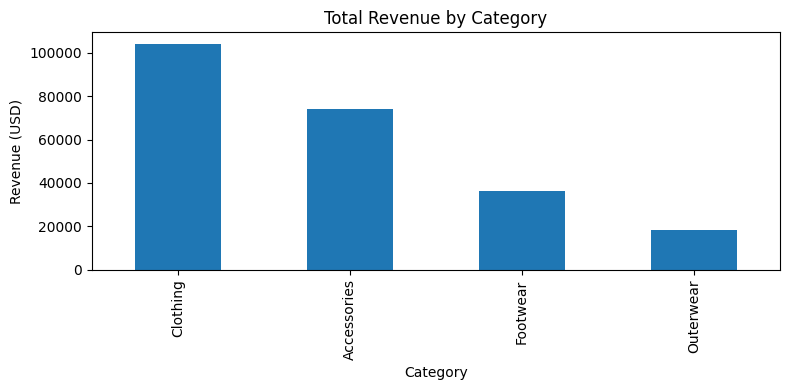

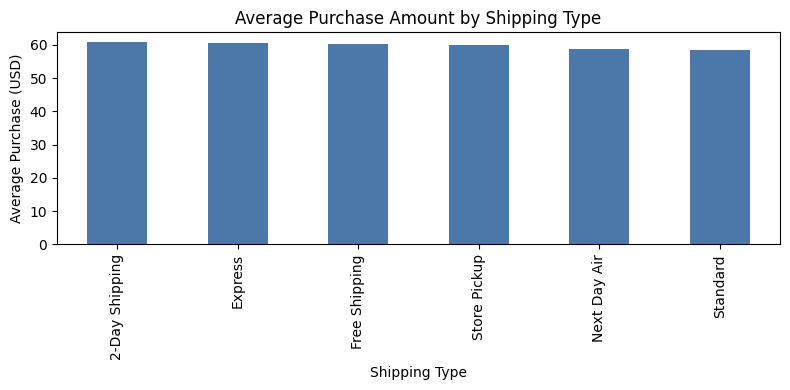

In [55]:
# Revenue by category
category_revenue = df.groupby("category")["purchase_amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
category_revenue.plot(kind="bar")
plt.title("Total Revenue by Category")
plt.ylabel("Revenue (USD)")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

# Average purchase by shipping type
shipping_aov = df.groupby("shipping_type")["purchase_amount"].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
shipping_aov.plot(kind="bar", color="#4C78A8")
plt.title("Average Purchase Amount by Shipping Type")
plt.ylabel("Average Purchase (USD)")
plt.xlabel("Shipping Type")
plt.tight_layout()
plt.show()

## Summary
- Cleaned and standardized customer purchase data.
- Engineered `age_group` and `purchase_frequency_days` features.
- Prepared the dataset for SQL analysis and dashboarding.
- Validated core trends with quick in-notebook visuals.

### Next steps
- Run additional SQL queries for segment-level insights.
